In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_palette("pastel")

In [5]:
df = pd.read_csv(r'C:\Users\Vivek\Desktop\vgsales.csv')

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Top 10 best selling video games globally

In [7]:
top_10_Games_Globally = df.sort_values(by='Global_Sales', ascending=False).head(10)

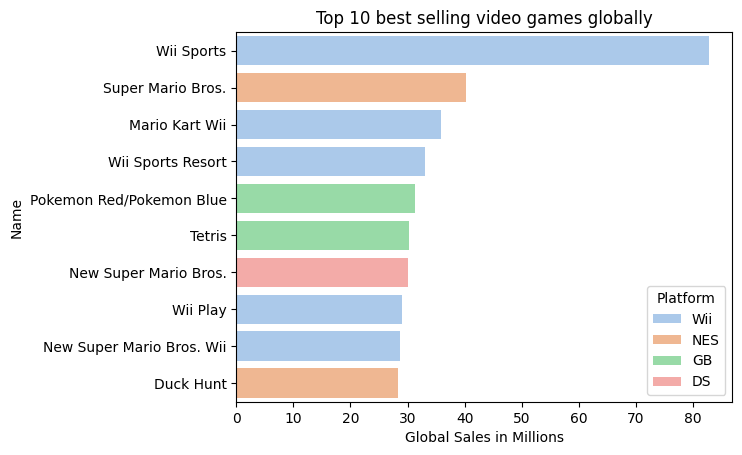

In [8]:
sns.barplot(data=top_10_Games_Globally, x='Global_Sales', y='Name', hue='Platform', dodge=False)
plt.title("Top 10 best selling video games globally")
plt.xlabel("Global Sales in Millions")
plt.ylabel("Name")
plt.show()

# Distribution of games released across the years

In [9]:
year_dist = df['Year'].value_counts()

In [10]:
year_dist.head()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: count, dtype: int64

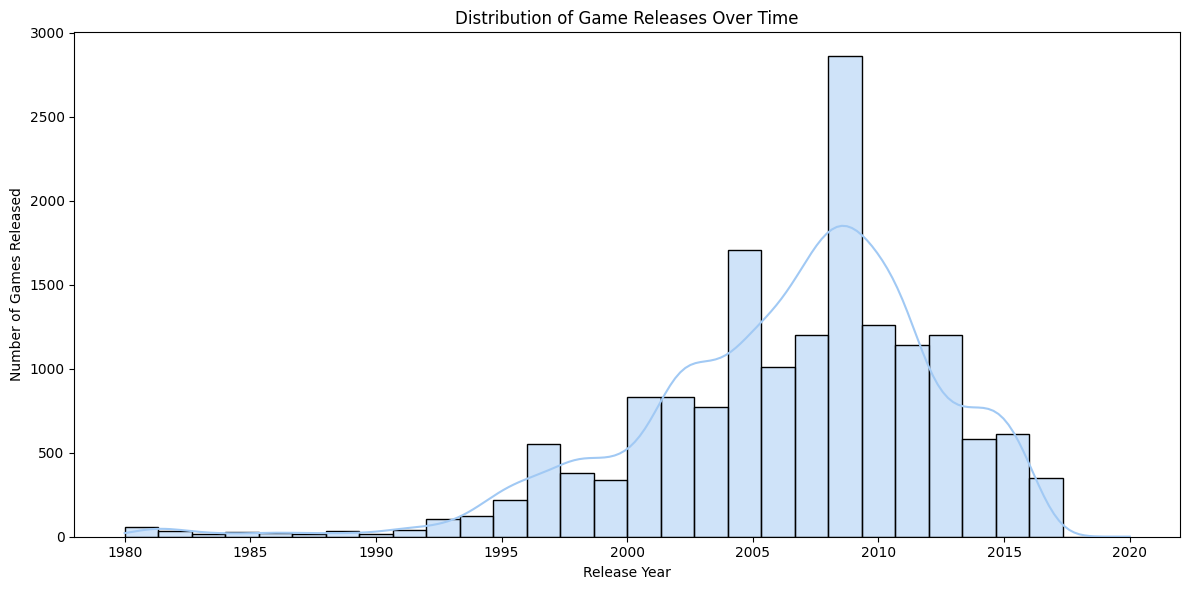

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'].dropna(), bins=30, kde=True)
plt.title("Distribution of Game Releases Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.tight_layout()
plt.show()

# Total Sales by Genre

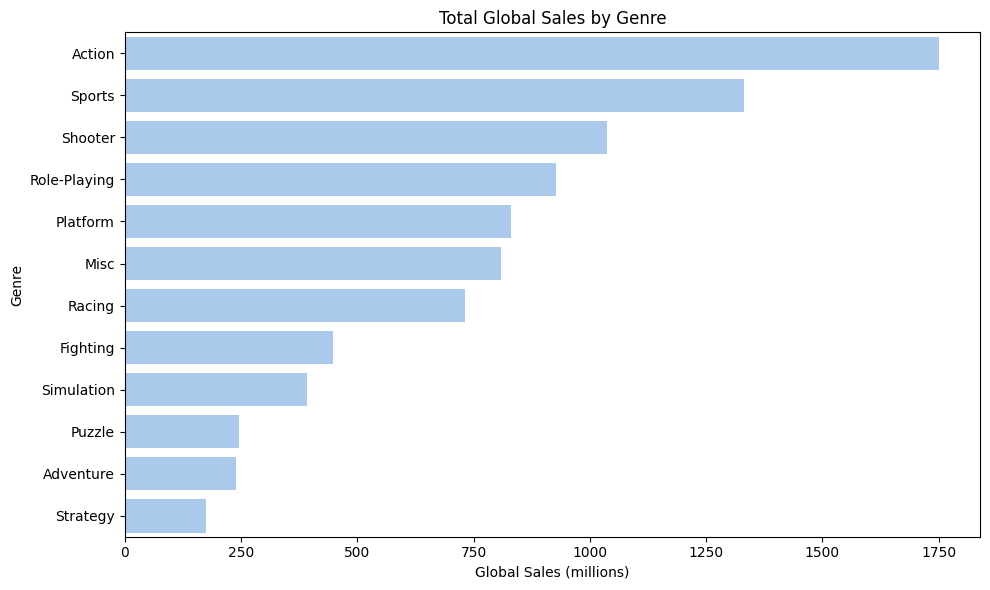

In [12]:
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title("Total Global Sales by Genre")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Top 10 Publishers by Total Global Sales

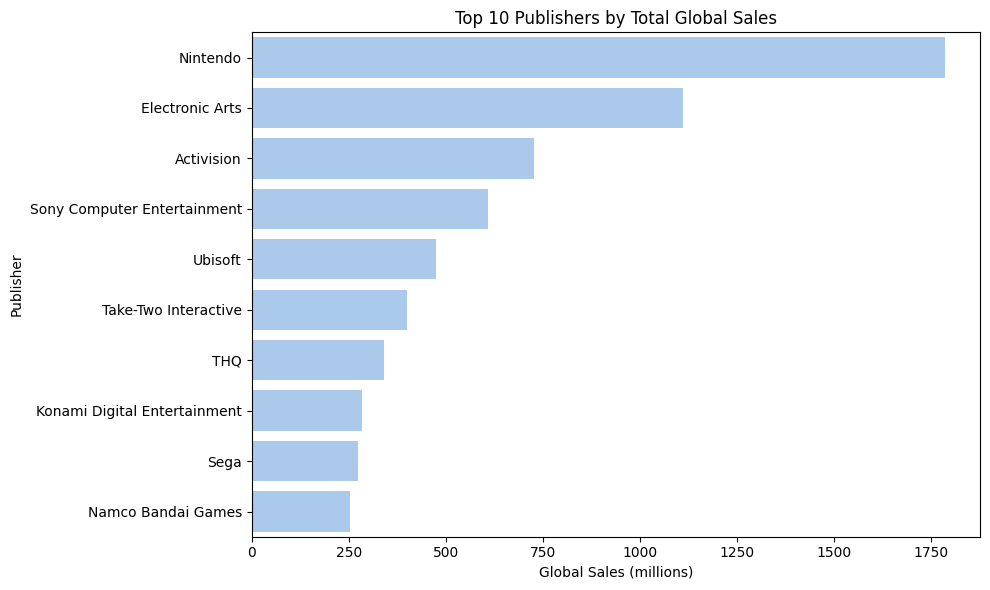

In [13]:
publisher_sales = df.groupby("Publisher")["Global_Sales"].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_sales.values, y=publisher_sales.index)
plt.title("Top 10 Publishers by Total Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

# Top 10 platforms by numbers of games released

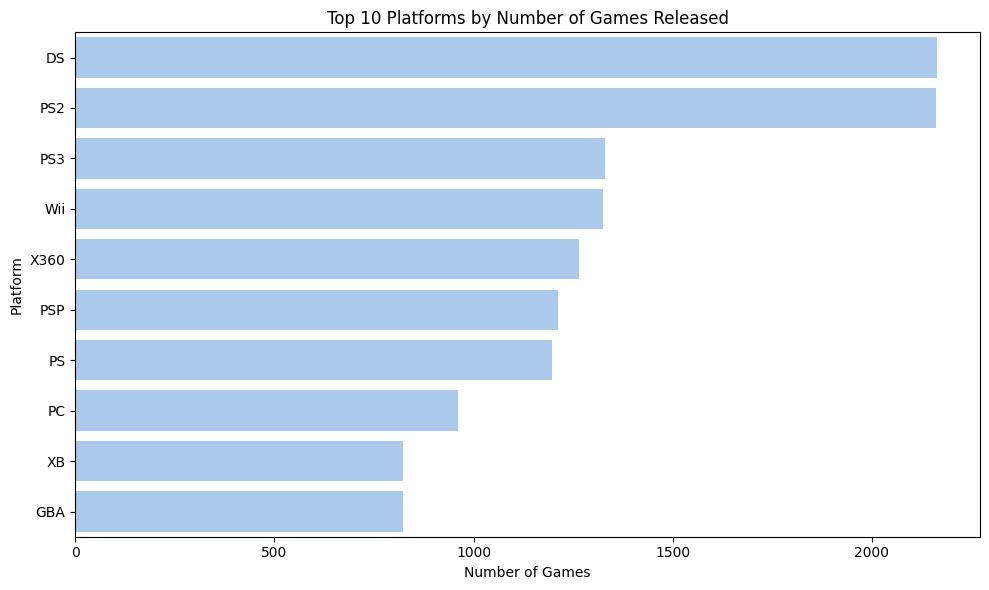

In [14]:
platform_counts = df["Platform"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.values, y=platform_counts.index)
plt.title("Top 10 Platforms by Number of Games Released")
plt.xlabel("Number of Games")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

#  Total Sales by Region

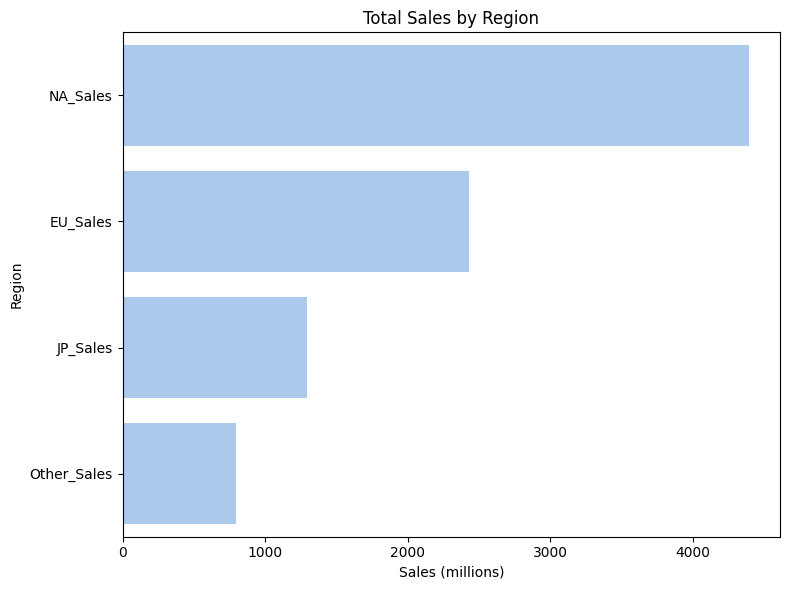

In [15]:
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
region_sums = df[regions].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_sums.values, y=region_sums.index)
plt.title("Total Sales by Region")
plt.xlabel("Sales (millions)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Genre Trends Over Time (Average Global Sales)

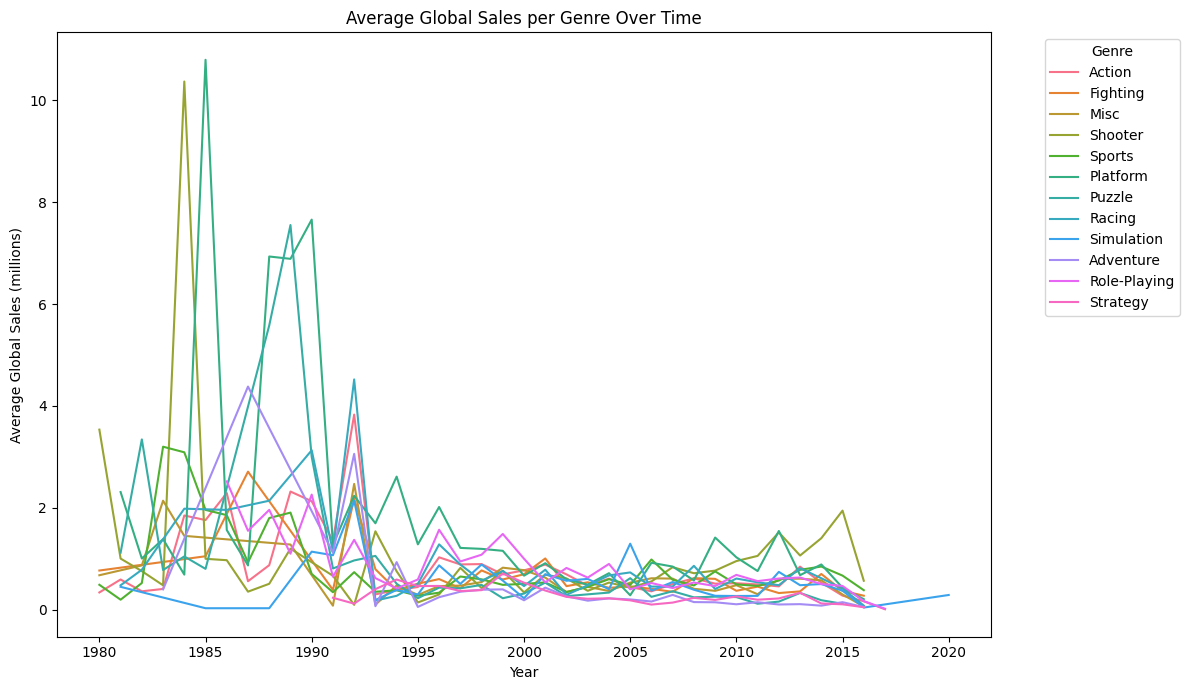

In [16]:
genre_year = df.dropna(subset=['Year']).groupby(['Year', 'Genre'])['Global_Sales'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=genre_year, x='Year', y='Global_Sales', hue='Genre')
plt.title("Average Global Sales per Genre Over Time")
plt.xlabel("Year")
plt.ylabel("Average Global Sales (millions)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Market Share by Genre

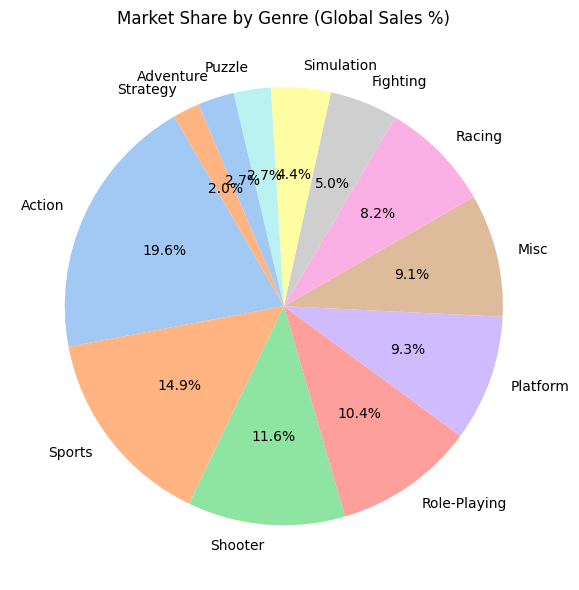

In [17]:
plt.figure(figsize=(6, 6))
genre_sales_pct = genre_sales / genre_sales.sum()
plt.pie(genre_sales_pct, labels=genre_sales_pct.index, autopct='%1.1f%%', startangle=120)
plt.title("Market Share by Genre (Global Sales %)")
plt.tight_layout()
plt.show()